# Caos en sistemas contínuos

In [4]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from IPython.display import YouTubeVideo
#%pylab inline

In [5]:
# El código siguiente recarga (reloads) las rutinas externas cada vez que el código cambia (es útil para "debuggear" código externo)

%load_ext autoreload
%autoreload 2

In [6]:
from utils import normalizeRads, normalizeAngle

##### Bibliografía de soporte

- Una buena referencia para como deducir las ecuaciones de movimiento es: [**Single and Double Pendulum** de _Gabriela González_](http://www.phys.lsu.edu/faculty/gonzalez/Teaching/Phys7221/DoublePendulum.pdf).

### La vida real

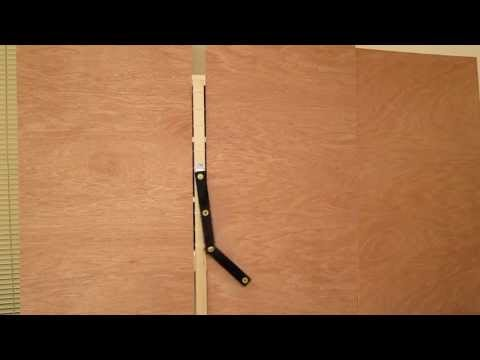

In [7]:
YouTubeVideo("AwT0k09w-jw")

## El péndulo simple

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Simple_pendulum_height.svg/250px-Simple_pendulum_height.svg.png" width="200" height="200">

<div class="alert alert-warning"> Imagen cortesía de Wikipedia</div>

### Ecuación de movimiento

$$
\ddot{\theta} = -\frac{g}{l}\sin\theta
$$

#### Análisis dimensional

Un análisis poderoso (no numérico o computacional) que es bueno introducir aquí, es el [_análisis dimensional_](http://en.wikipedia.org/wiki/Dimensional_analysis). No lo vamos a explotar en su totalidad, pero lo usaremos para comprobar la validez de las ecuaciones de movimiento.

Si las ecuaciones son correctas, ambos lados de la ecuación deben de tener las mismas unidades. Las unidades fundamentales son **longitud**, $[L]$, **masa**, $[M]$ y **tiempo** $[T]$.

Empezando por el lado izquierdo, $g$ es la aceleración de la gravedad y tiene unidades de $m/s^2$ que en unidades fundamentales es:

$$
[g] = \left[\frac{L}{T^2}\right]
$$

Así mismo, la longitud del péndulo, $l$, tiene unidades de $m$ $\to$ 

$$
[l] = [L]
$$

y $\theta$ es adimensional. Por lo tanto el **rhs** tiene unidades de 

$$
[rhs] = [T^{-2}]
$$

Por su parte el **lhs**, $\theta$ como vimos es adimensional, pero está derivada respecto al tiempo, entonces,

$$
\left[\frac{d}{dt^2}\right] = \left[\frac{1}{T^2}\right]
$$

con lo cual se establece la igualdad de unidades, dándonos así un indicador de que al menos _no están tan mal_.

<div class="alert alert-warning">
**Nota** El análisis dimensional es muy poderoso aunque con limitaciones. Usalo siempre que puedas para verificar tu trabajo.
</div>

### Energía

La energía total, $E$, se descompone en energía cinética, $K$ y energía potencial $U$.

$$
E = K + U
$$

La energía potencial depende de la posición en el campo graitacional

$$
U = - m g y
$$


$$
U = - m g l \sin\theta
$$

Y la energía cinética

$$
K = \frac{1}{2} m v^2
$$

$$
K = \frac{1}{2} m \left [ \dot{x^2} + \dot{y^2} \right ]
$$

$$
K = \frac{1}{2} m l \dot{\theta^2}
$$

Así,

$$
E = \frac{1}{2} m l \dot{\theta^2} - m g l \sin\theta
$$

<div class="alert alert-info">
**Ejercicio** Revisa las ecuaciones con análisis dimensional y verifica que sean correctas
</div>

### Animación

In [15]:
from pendulo import Pendulo
from IPython.display import HTML

In [16]:
pendulo = Pendulo(estado_inicial=[np.pi/2, 0])
fps = 30 

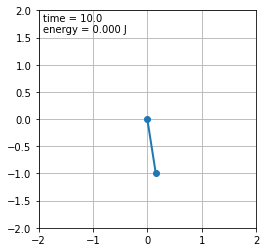

In [17]:
HTML(pendulo.animar(1./fps).to_html5_video())

### Análisis Gráfico

In [7]:
pendulo.integrate()

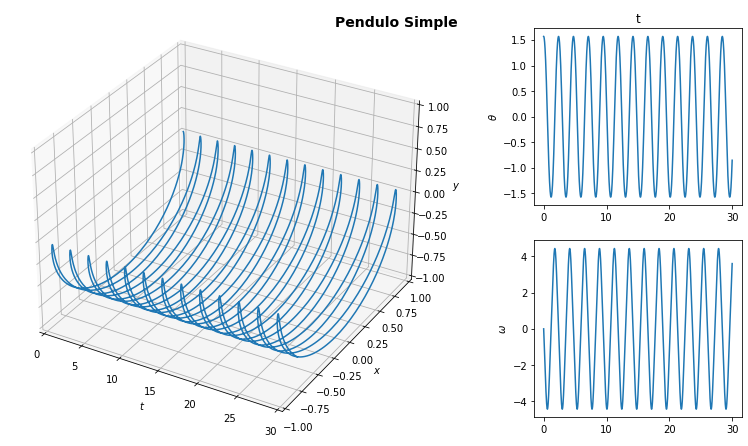

In [8]:
pendulo.plot()

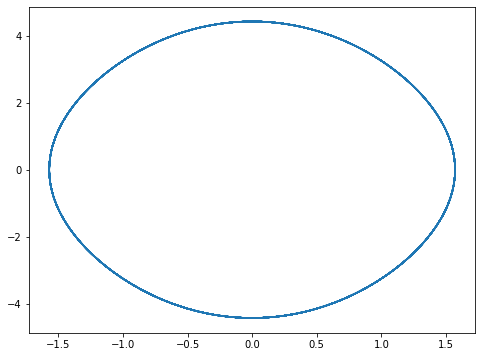

In [9]:
pendulo.phase_space()

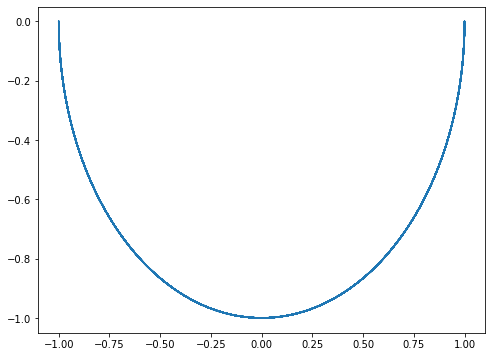

In [10]:
pendulo.xy_snapshot()

### Sensibilidad a condiciones iniciales

In [11]:
pendulo1 = Pendulo([np.pi/2, 3.], longitud= 0.7)
pendulo1.integrate()
pendulo2 = Pendulo([np.pi/2, 3.0001], longitud= 0.7)
pendulo2.integrate()
pendulo3 = Pendulo([np.pi/2, 3.0002], longitud= 0.7)
pendulo3.integrate()

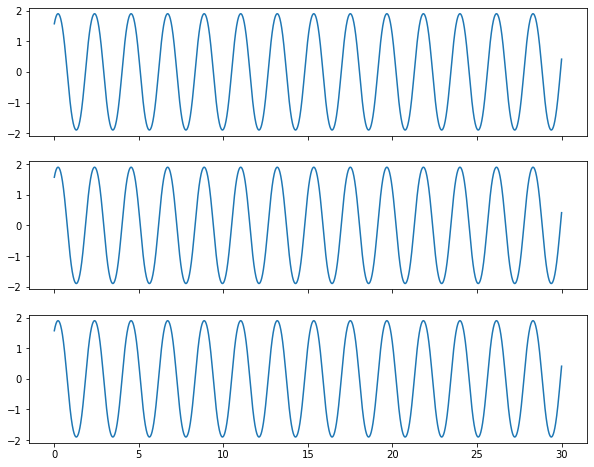

In [12]:
fig, ax = plt.subplots(3,1, figsize=(10,8), sharex = True)

ax[0].plot(pendulo1.tau, pendulo1.theta())
ax[1].plot(pendulo2.tau, pendulo2.theta())
ax[2].plot(pendulo3.tau, pendulo3.theta())

plt.show()

#### Evolución en el tiempo de la diferencia entre los ángulos

In [13]:
delta_theta = abs(pendulo1.theta() - pendulo2.theta())

/home/skalas/src/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


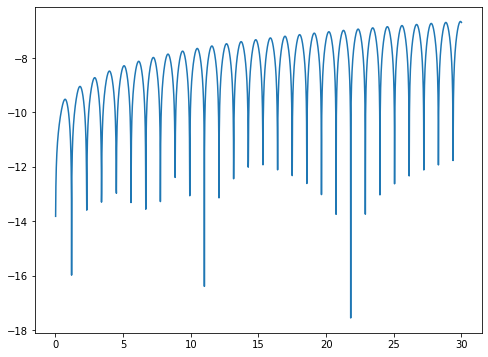

In [14]:
plt.figure(1, figsize=(8,6))
plt.plot(pendulo1.tau, np.log(delta_theta))
plt.show()

## El péndulo doble

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Double-Pendulum.svg/2000px-Double-Pendulum.svg.png" width="200" height="200">

<div class="alert alert-warning"> Imagen cortesía de Wikipedia</div>

### Ecuaciones de movimiento

$$
(m_1 + m_2)L_1\ddot{\theta_1} + m_2 L_2 \ddot{\theta_2} \cos(\theta_2 -\theta_1) = m_2 L_2 \dot{\theta_2^2}\sin(\theta_2 - \theta_1) - (m_1+m_2) g \sin \theta_1
$$

$$
L_2 \ddot{\theta_2}  + L_1\ddot{\theta_1}\cos(\theta_2 - \theta_1) = - L_1 \dot{\theta_1^2}\sin(\theta_2 - \theta_1) - g \sin\theta_2
$$

<div class="alert alert-info">
**Ejercicio** Revisa las ecuaciones con análisis dimensional y verifica que sean correctas
</div>

<div class="alert alert-info">
**Ejercicio** Intenten escribir como una ecuación de primer grado. 
</div>

<div class="alert alert-warning">
**Nota** El truco se puede ver [aquí](http://rotations.berkeley.edu/?page_id=163)
</div>

### Energía

La energía potencial es:

$$
V = - m_1gy_1 - m_2gy_2
$$

$$
V = - (m_1 + m_2 )g L_1 \cos\theta_1  - m_2 g L_2 \cos\theta_2
$$

La energía cinética es:

$$
K = \frac{1}{2} m_1 v_1^2 + \frac{1}{2} m_2 v_2^2
$$

$$
K = \frac{1}{2} m_1 L_1^2 \dot{\theta_1^2} + \frac{1}{2}m_2\left[L_1^2\dot{\theta_1^2} + L_2^2\dot{\theta_2^2} + 2 L_1 L_2 \dot{\theta_1} \dot{\theta_2} \cos\left(\theta_1 - \theta_2\right)\right] 
$$

Finalmente la energía total, $E$, es

$$
E = K + V
$$

### Animación

In [19]:
from pendulo_doble import PenduloDoble

In [20]:
d_pendulo = PenduloDoble()
fps = 30 

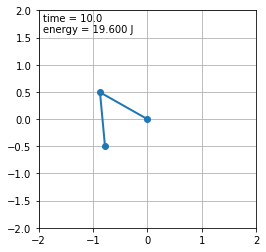

In [21]:
HTML(d_pendulo.animar(1./fps).to_html5_video())


### Análisis gráfico

In [18]:
d_pendulo = PenduloDoble()
d_pendulo.integrate(t_f=100)

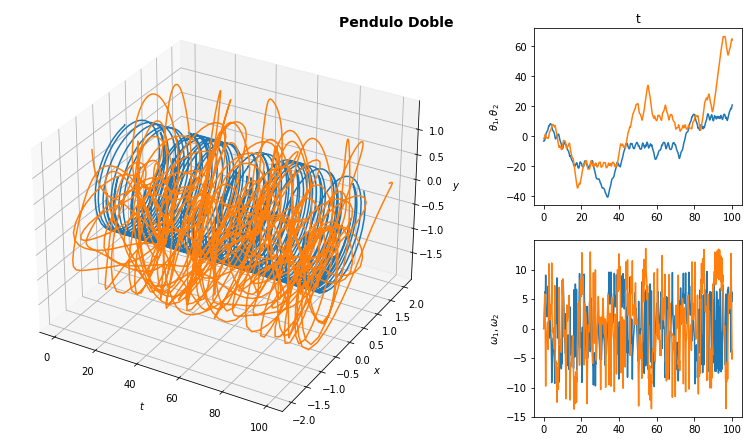

In [19]:
d_pendulo.plot()

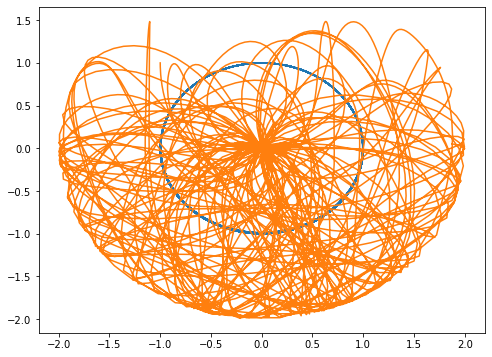

In [20]:
d_pendulo.xy_snapshot()

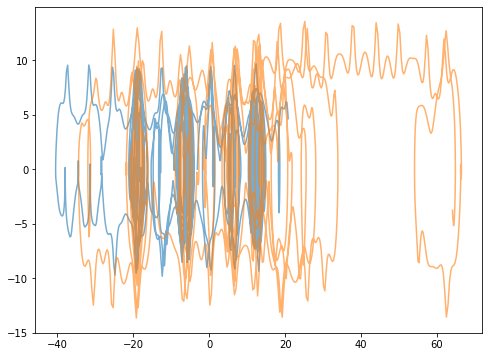

In [21]:
d_pendulo.phase_space()

## Sensibilidad a condiciones iniciales

In [22]:
d_pendulo1 = PenduloDoble([np.pi, 0.,0., 3.], L1= 0.7, L2=0.7)
d_pendulo1.integrate()
d_pendulo2 = PenduloDoble([np.pi, 0.,0., 3.0001], L1= 0.7, L2=0.7)
d_pendulo2.integrate()
d_pendulo3 = PenduloDoble([np.pi, 0.,0., 3.0002], L1= 0.7, L2=0.7)
d_pendulo3.integrate()

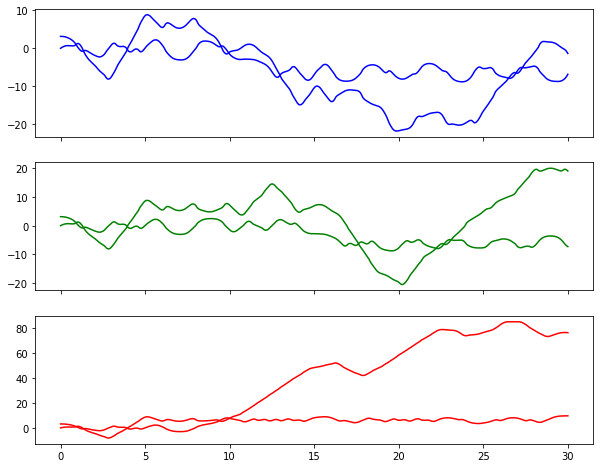

In [23]:
fig, ax = plt.subplots(3,1, figsize=(10,8), sharex = True)

ax[0].plot(d_pendulo1.tau, d_pendulo1.theta(), label="theta", color="blue")
ax[1].plot(d_pendulo2.tau, d_pendulo2.theta(), label="omega", color="green")
ax[2].plot(d_pendulo3.tau, d_pendulo3.theta(), color='red', label="Energia")

plt.show()

#### Evolución en el tiempo de la diferencia entre los ángulos

In [24]:
delta_theta = abs(d_pendulo1.theta() - d_pendulo2.theta())

/home/skalas/src/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


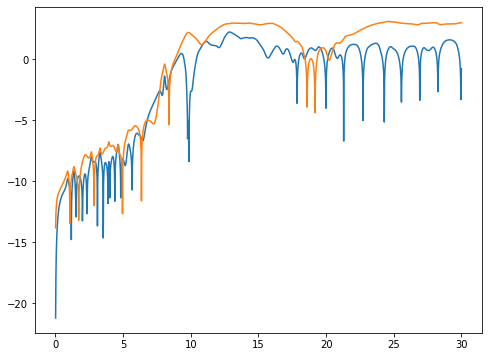

In [25]:
plt.figure(1, figsize=(8,6))
plt.plot(d_pendulo1.tau, np.log(delta_theta))
plt.show()

### Sensibilidad ante las condiciones iniciales: Animación

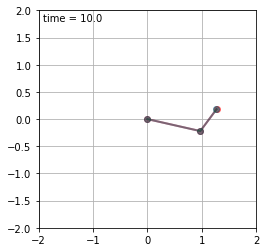

In [22]:
d_pendulo1 = PenduloDoble([4, 0.,3., 0.], M1=0.5, M2=1., L1= 1., L2=0.5)
d_pendulo2 = PenduloDoble([4, 0.,3.00000003, 0.], M1=0.5, M2=1., L1= 1., L2=0.5)
d_pendulo3 = PenduloDoble([4, 0.,3.00000004, 0.], M1=0.5, M2=1., L1= 1., L2=0.5)

dt = 1./30

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-2, 2), ylim=(-2, 2))

ax.grid()

line1, = ax.plot([], [], 'o-', lw=2, color="red", alpha=0.5)
line2, = ax.plot([], [], 'o-', lw=2, color="blue", alpha=0.3)
line3, = ax.plot([], [], 'o-', lw=2, color="green", alpha=0.3)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
#energy_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

def init():
    """initialize animation"""
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    time_text.set_text('')
#    energy_text.set_text('')
    return line1, line2, line3, time_text#, energy_text

def animate(i):
    """perform animation step"""
    global d_pendulo1, d_pendulo2, dt
    d_pendulo1.step(dt)
    d_pendulo2.step(dt)
    d_pendulo3.step(dt)

    line1.set_data(*d_pendulo1.posicion())
    line2.set_data(*d_pendulo2.posicion())
    line3.set_data(*d_pendulo3.posicion())
    time_text.set_text('time = %.1f' % d_pendulo1.time_elapsed)
    #energy_text.set_text('energy = %.3f J' % self.energia())
    return line1, line2, line3, time_text #, energy_text

from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * dt - (t1 - t0)

ani = animation.FuncAnimation(fig, animate, frames=300,
                              interval=interval, blit=True, init_func=init)

HTML(ani.to_html5_video())

In [27]:
%cat pendulo.py

# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import mpl_toolkits.mplot3d.axes3d as a3d

from numpy import sin, cos

from utils import normalizeRads, normalizeAngle
from scipy.integrate import odeint 

class Pendulo:
    """
    Péndulo
    -----------------------
    
    El estado inicial está dado por [theta, omega] ambos en radianes.
    Theta y omega son la posición angular y la velocidad angular respectivamente.
    """
    def __init__(self, 
                 estado_inicial = [-np.pi/6, 0.],
                 masa = 1.0, # masa en kg
                 longitud = 1.0, # longitud en m
                 gravedad = 9.8, # aceleración de la gravedad, en m/s^2
                 origen=(0,0)):
                 
        self.estado_inicial = np.asarray(estado_inicial, dtype="float")
        self.estado_inicial = normalizeRads(self.estado_inicial, decimals=8) # normalizamos para estar entre [-pi, pi)
        
        sel

In [ ]:
%cat doble_pendulo.py